In [45]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Задача 1

Даны значения зарплат из выборки выпускников: 

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150

Без использования статистических функций вроде mean, std, var, посчитать среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

#### Решение

Формулы для расчета:  
Среднее арифметическое $M(X)=\frac{1}{n}\sum\limits_{i=1}^nx_i$  

Среднее квадратичное отклонение  $\sigma=\sqrt{\frac{\sum\limits_{i=1}^n(x_i-\overline{x})^2}{n}}$

Смещенная оценка дисперсии  $\sigma^2={\frac{\sum\limits_{i=1}^n(x_i-\overline{x})^2}{n}}$

Несмещенная оценка дисперсии  $\sigma^2_{несмещ.}={\frac{\sum\limits_{i=1}^n(x_i-\overline{x})^2}{n-1}}$

In [3]:
data = np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150])

In [48]:
M = data.sum() / len(data)

sigma = np.sqrt(((data - M)**2).sum() / (len(data)))

sigma_2 = ((data - M)**2).sum() / (len(data))

sigma_2_nesm = ((data - M)**2).sum() / (len(data) - 1)

#### Ответ

In [49]:
M, sigma, sigma_2, sigma_2_nesm

(65.3, 30.823854398825596, 950.11, 1000.1157894736842)

In [50]:
data.mean(), data.std(), data.var(ddof=0), data.var(ddof=1)

(65.3, 31.624607341019814, 950.11, 1000.1157894736842)

### Задача 2

Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из boxplot. В этой задаче можно использовать статистические функции.

#### Решение

In [22]:
data = pd.Series(data)

In [41]:
q_1 = data.quantile(0.25)

In [24]:
q_3 = data.quantile(0.75)

In [26]:
iqr = q_3 - q_1

In [29]:
boxplot_range = (q_1 - 1.5 * iqr, q_3 + 1.5 * iqr)

In [40]:
outliers = data[(data < boxplot_range[0]) | (data > boxplot_range[1])]

#### Ответ

In [51]:
q_1, q_3, iqr, outliers.values

(42.0, 81.0, 39.0, array([150]))

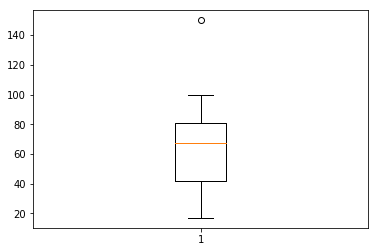

In [52]:
plt.boxplot(data);

### Задача 3

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

Замечание: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

#### Решение

Пусть событие $A$ - студент учится на факультете А, событие $B$ - студент учится на факультете B, событие $C$ - студент учится на факультете С. Событие $S$ - студент сдал первую сессию. $n$ - количество студентов поступивших на факультет A.

Тогда:

$P(A)=\frac{n}{n+n+2n}=\frac{1}{4}=0.25$

$P(B)=\frac{n}{n+n+2n}=\frac{1}{4}=0.25$

$P(C)=\frac{2n}{n+n+2n}=\frac{1}{2}=0.5$

$P(S|A)=0.8$

$P(S|B)=0.7$

$P(S|C)=0.9$

Вероятность события $A$ при условии события $S$ распишем по формуле Байеса:

$P(A|S)=\frac{P(A)P(S|A)}{P(S)}$, где $P(S)$ распишем по формуле полной вероятности,

$P(A|S)=\frac{P(A)P(S|A)}{P(A)P(S|A)+P(B)P(S|B)+P(C)P(S|C)}$

Аналогично для события $B$ при условии $S$, а так же для события $C$ при условии $S$:

$P(B|S)=\frac{P(B)P(S|B)}{P(A)P(S|A)+P(B)P(S|B)+P(C)P(S|C)}$

$P(C|S)=\frac{P(C)P(S|C)}{P(A)P(S|A)+P(B)P(S|B)+P(C)P(S|C)}$

In [53]:
P_A = 0.25
P_B = 0.25
P_C = 0.5

P_SA = 0.8
P_SB = 0.7
P_SC = 0.9

P_S = P_A*P_SA + P_B*P_SB + P_C*P_SC

P_AS = (P_A*P_SA) / P_S
P_BS = (P_B*P_SB) / P_S
P_CS = (P_C*P_SC) / P_S

#### Ответ

In [57]:
P_AS, P_BS, P_CS

(0.24242424242424246, 0.21212121212121213, 0.5454545454545455)